In [1]:
import pandas as pd
df=pd.read_csv("очищенные_данные_дота1.csv",encoding='utf-8', sep=';', skipinitialspace=True)
df = df.dropna(axis=1, how='all')
df['Восприятие рейтинга'] = df['Мой возможный птс намного больше, чем мой актуальный'] + df['MMR - это всего лишь цифра, она не показывает реальный скилл игрока']
df.head()

,Отметка времени,Id,Пол,Возраст,Максимальный рейтинг в Доте,Рейтинг в доте на данный момент,Количество часов в игре (хотя бы примерное),Какое количество игр в среднем ты играешь в неделю?,"У меня ухудшается настроение, если я долго не играю в Доту 2",Почти все свое свободное время я трачу на Доту 2,...,"У меня часто пропадает желание играть, когда мои тиммейты играют плохо","MMR - это всего лишь цифра, она не показывает реальный скилл игрока",Количество времени в игре,Эмоциональная зависимость,Негативные последствия,Нацеленность на результат,Отсутствие стрессоустойчивости,Макс-реальный,Внешняя атрибуция,Восприятие рейтинга
0,2021/11/08 1:10:08 PM GMT+3,2,М,21,980,960,2808,8,1,2,...,3,5,5,2,4,11,7,20,7,10
1,2021/11/08 1:11:03 PM GMT+3,4,М,19,2370,2130,4500,25,3,4,...,5,5,10,8,8,19,8,240,12,8
2,2021/11/08 1:11:32 PM GMT+3,5,М,15,2700,2400,700,25,1,3,...,2,3,8,2,3,16,8,300,9,8
3,2021/11/08 1:11:36 PM GMT+3,6,М,17,4360,4320,2600,25,4,4,...,4,1,12,9,8,20,8,40,9,4
4,2021/11/08 1:12:00 PM GMT+3,7,М,22,3000,2100,3700,8,1,2,...,3,2,7,5,8,16,9,900,10,6


In [28]:
from scipy.stats import kstest, norm #описательные до выбросов
from scipy.stats import anderson
df_s = df[['Рейтинг в доте на данный момент','Восприятие рейтинга']]
mean = df_s.mean()
std = df_s.std()
desc = df_s.describe().round(3)
desc.loc['mode'] = df_s.mode().iloc[0]
desc.loc['skewness'] = df_s.skew().round(3)
desc.loc['kurtosis'] = df_s.kurtosis().round(3)
desc.loc['ks_stat'] = df_s.apply(lambda x: kstest(x, norm.cdf, args=(mean[x.name], std[x.name])).statistic).round(3)
desc.loc['ks_p'] = df_s.apply(lambda x: kstest(x, norm.cdf, args=(mean[x.name], std[x.name])).pvalue).round(3)
desc.loc['anderson_stat'] = df_s.apply(lambda x: round(anderson(x).statistic, 3))
desc

,Рейтинг в доте на данный момент,Восприятие рейтинга
count,7448.000,7448.000
mean,2464.097,6.124
std,34774.622,2.043
min,0.000,2.000
25%,870.000,5.000
50%,1810.000,6.000
75%,3000.000,8.000
max,3000000.000,10.000
mode,2000.000,6.000
skewness,86.029,0.008


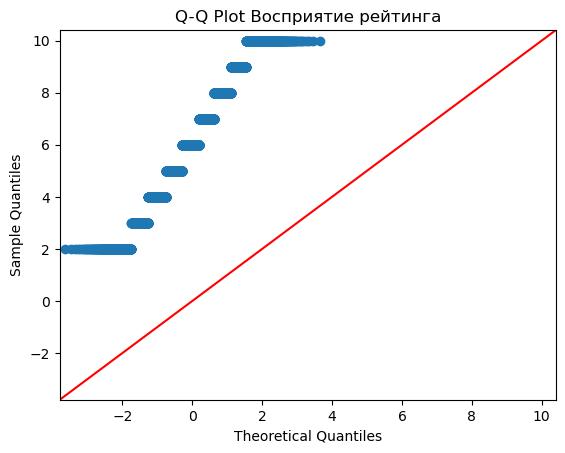

In [4]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
sm.qqplot(df['Восприятие рейтинга'], line='45')
plt.title("Q-Q Plot Восприятие рейтинга")
plt.show()

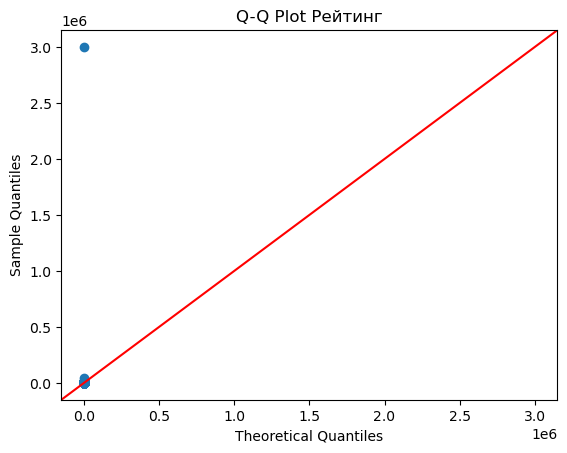

In [73]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
sm.qqplot(df['Рейтинг в доте на данный момент'], line='45')
plt.title("Q-Q Plot Рейтинг")
plt.show()

In [6]:
import numpy as np #все, что ниже до qq это про поиск выбросов в рейтинге (по размаху и по среднему с std)
q3=np.percentile(df['Рейтинг в доте на данный момент'], 75)
q1=np.percentile(df['Рейтинг в доте на данный момент'], 25)
iqr=q3-q1
iqr_b=q1-1.5*iqr
iqr_t=q3+1.5*iqr
print(iqr_b, iqr_t)

-2325.0 6195.0


In [7]:
df[df['Рейтинг в доте на данный момент']> iqr_t].shape

(75, 38)

In [8]:
mean = df['Рейтинг в доте на данный момент'].mean()
std = df['Рейтинг в доте на данный момент'].std()
std_b=mean-3*std
std_t=mean+3*std
print(std_b, std_t)

-101859.77022941754 106787.96464402549


In [9]:
df[df['Рейтинг в доте на данный момент']> std_t].shape

(1, 38)

In [10]:
iqr_no=df[df['Рейтинг в доте на данный момент']< iqr_t]
std_no=df[df['Рейтинг в доте на данный момент']< std_t]

In [11]:
print(df['Рейтинг в доте на данный момент'].mean())
print(iqr_no['Рейтинг в доте на данный момент'].mean())
print(std_no['Рейтинг в доте на данный момент'].mean())

2464.0972073039743
2002.7450155974502
2061.5813079092254


In [12]:
print(df['Рейтинг в доте на данный момент'].median())
print(iqr_no['Рейтинг в доте на данный момент'].median())
print(std_no['Рейтинг в доте на данный момент'].median())

1810.0
1800.0
1810.0


In [13]:
import seaborn as sns
df_clean=df[df['Рейтинг в доте на данный момент'] <= 17000]

Text(0.5, 1.0, 'Q-Q Plot Рейтинг')

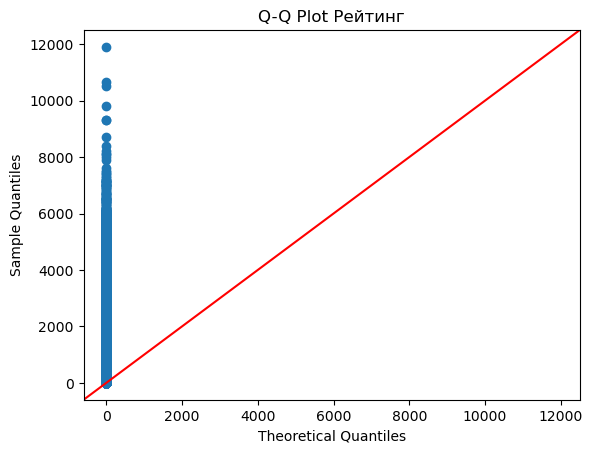

In [14]:
sm.qqplot(df_clean['Рейтинг в доте на данный момент'], line='45')
plt.title("Q-Q Plot Рейтинг")

In [15]:
from scipy.stats import kstest, norm #описательные после удаления выбросов
from scipy.stats import anderson
df_s = df_clean[['Рейтинг в доте на данный момент','Восприятие рейтинга']]
mean = df_s.mean()
std = df_s.std()
desc = df_s.describe().round(3)
desc.loc['mode'] = df_s.mode().iloc[0]
desc.loc['skewness'] = df_s.skew().round(3)
desc.loc['kurtosis'] = df_s.kurtosis().round(3)
desc.loc['ks_stat'] = df_s.apply(lambda x: kstest(x, norm.cdf, args=(mean[x.name], std[x.name])).statistic).round(3)
desc.loc['ks_p'] = df_s.apply(lambda x: kstest(x, norm.cdf, args=(mean[x.name], std[x.name])).pvalue).round(3)
desc.loc['anderson_stat'] = df_s.apply(lambda x: round(anderson(x).statistic, 3))
desc

,Рейтинг в доте на данный момент,Восприятие рейтинга
count,7445.000,7445.000
mean,2053.109,6.124
std,1494.820,2.043
min,0.000,2.000
25%,870.000,5.000
50%,1810.000,6.000
75%,3000.000,8.000
max,11900.000,10.000
mode,2000.000,6.000
skewness,0.898,0.008


(array([ 304.,  471.,  913., 1187.,    0., 1444., 1136.,  998.,  537.,
         455.]),
 array([ 2. ,  2.8,  3.6,  4.4,  5.2,  6. ,  6.8,  7.6,  8.4,  9.2, 10. ]),
 <BarContainer object of 10 artists>)

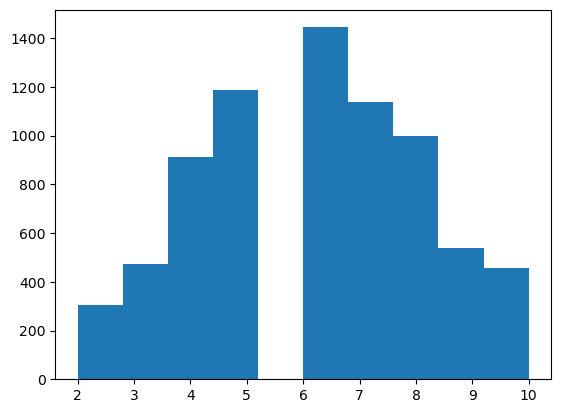

In [16]:
import matplotlib.pyplot as plt
plt.hist(df_clean["Восприятие рейтинга"])

(array([2.524e+03, 2.135e+03, 1.638e+03, 7.280e+02, 3.140e+02, 8.200e+01,
        1.600e+01, 4.000e+00, 3.000e+00, 1.000e+00]),
 array([    0.,  1190.,  2380.,  3570.,  4760.,  5950.,  7140.,  8330.,
         9520., 10710., 11900.]),
 <BarContainer object of 10 artists>)

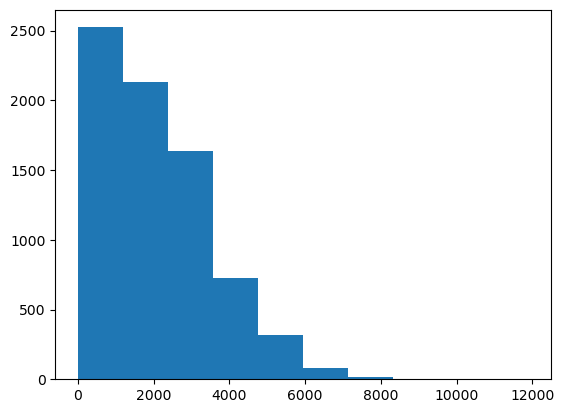

In [17]:
plt.hist(df_clean["Рейтинг в доте на данный момент"])

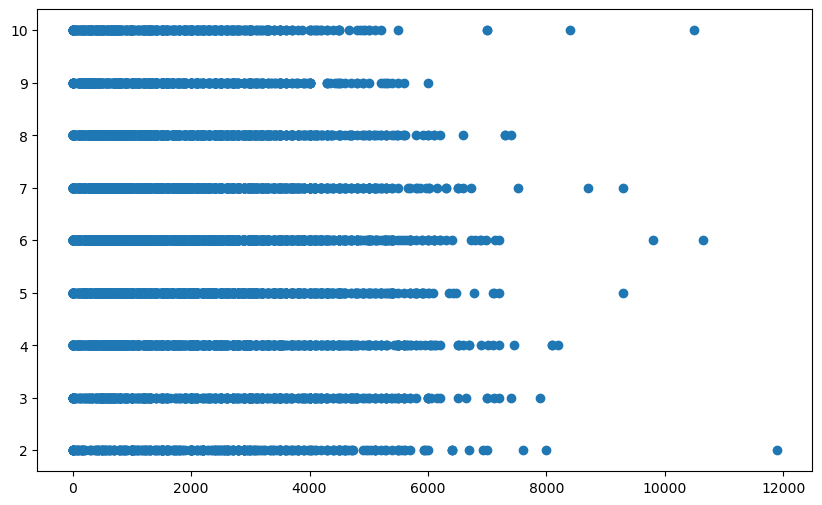

In [18]:
plt.figure(figsize=(10, 6))
plt.scatter(df_clean["Рейтинг в доте на данный момент"], df_clean["Восприятие рейтинга"])

C:\Users\Аннюта\AppData\Local\Temp\ipykernel_19672\400476201.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_clean['Рейтинг в доте на данный момент'])


<Axes: xlabel='Рейтинг в доте на данный момент', ylabel='Density'>

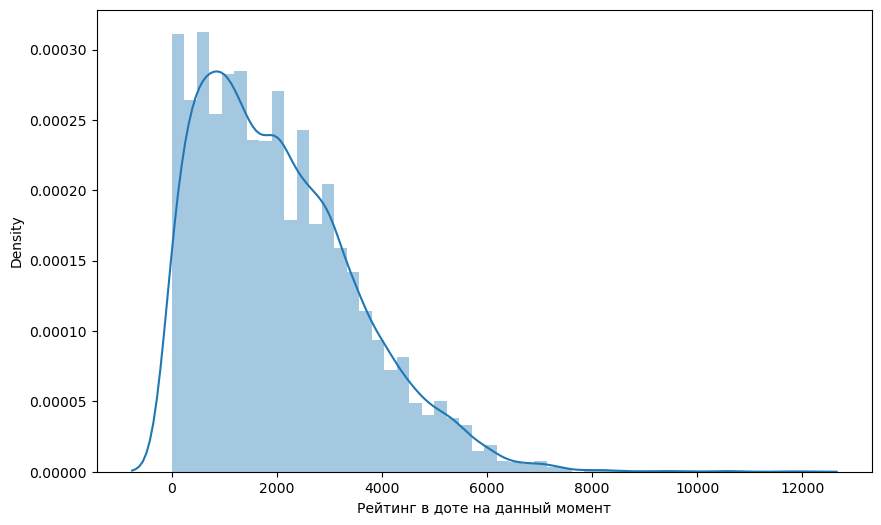

In [19]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.distplot(df_clean['Рейтинг в доте на данный момент'])

C:\Users\Аннюта\AppData\Local\Temp\ipykernel_19672\3537956211.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_clean['Восприятие рейтинга'])


<Axes: xlabel='Восприятие рейтинга', ylabel='Density'>

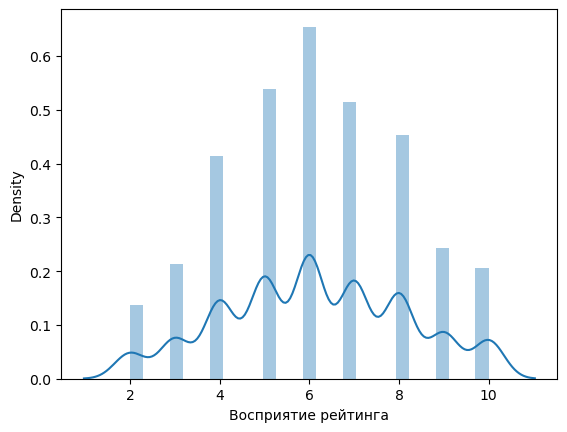

In [20]:
sns.distplot(df_clean['Восприятие рейтинга'])

In [21]:
correlation=df_clean[['Восприятие рейтинга', 'Рейтинг в доте на данный момент']].corr(method='spearman')
correlation

,Восприятие рейтинга,Рейтинг в доте на данный момент
Восприятие рейтинга,1.000000,-0.119897
Рейтинг в доте на данный момент,-0.119897,1.000000


In [22]:
from scipy.stats import spearmanr
import pandas as pd
cols = ['Восприятие рейтинга', 'Рейтинг в доте на данный момент']
data = df_clean[cols]

corr, p_values = spearmanr(data)
p_values_df = pd.DataFrame(p_values, columns=cols, index=cols )

p_values_df_rounded = p_values_df.round(4)
print(p_values_df_rounded)

                                 Восприятие рейтинга  \
Восприятие рейтинга                              0.0   
Рейтинг в доте на данный момент                  0.0   

                                 Рейтинг в доте на данный момент  
Восприятие рейтинга                                          0.0  
Рейтинг в доте на данный момент                              0.0  


<Axes: >

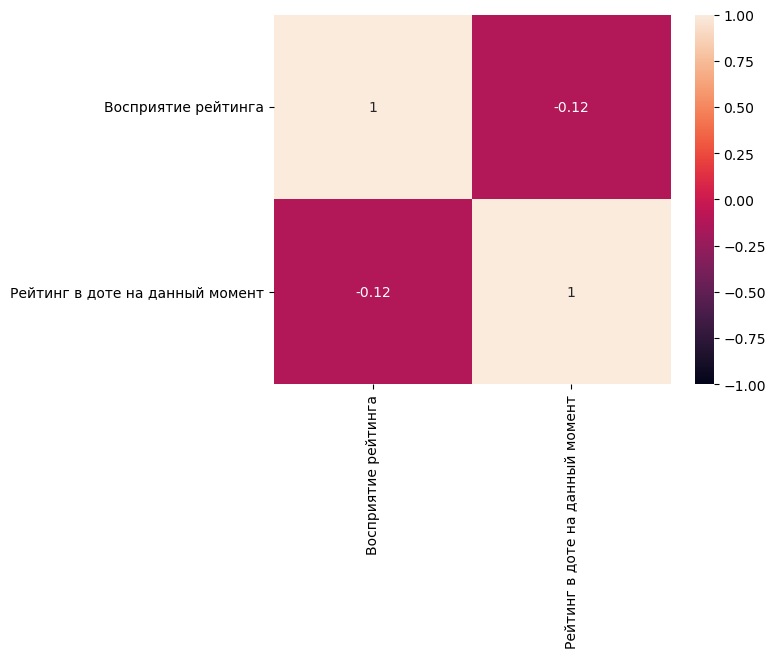

In [23]:
sns.heatmap(correlation, annot=True, vmax=1, vmin=-1)

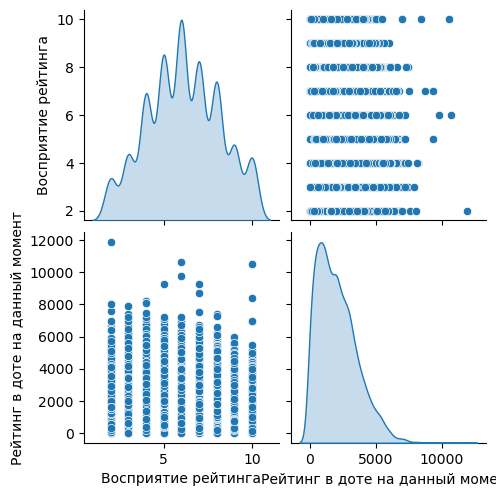

In [24]:
subset = df_clean[["Восприятие рейтинга", "Рейтинг в доте на данный момент"]]
sns.pairplot(subset, diag_kind='kde')

In [25]:
from scipy import stats
X=df_clean['Рейтинг в доте на данный момент']
y=df_clean['Восприятие рейтинга']
res=stats.linregress(X,y)
res

LinregressResult(slope=-0.00018574076075429161, intercept=6.50505315110666, rvalue=-0.13590489354635102, pvalue=4.996953006948865e-32, stderr=1.5694586351279463e-05, intercept_stderr=0.0398575777850901)

In [26]:
r_sq=res.rvalue**2
r_sq

0.018470140089845002

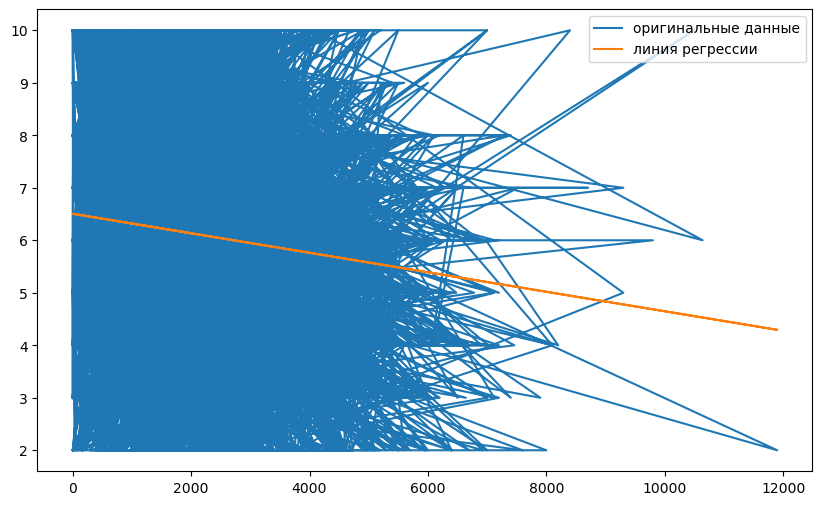

In [27]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(X,y, label='оригинальные данные')
plt.plot(X, res.intercept + res.slope*X, label='линия регрессии')
plt.legend()
plt.show()